In [1]:
import lmdb
import os
from tqdm import tqdm
import pickle
import sys
sys.path.append("/project/Pocket2mol")

def read_lmdb(lmdb_path, mode="idx"):
    """
    Read lmdb file.

    Args:
        lmdb_path (str): Path to the lmdb file.
        mode (str, optional): Read mode. "idx" to follow the idx order, "direct" to read the data directly (use when idx is not continuous).

    Returns:
        list: List of data read from the lmdb file.
    """
    env = lmdb.open(
        lmdb_path,
        subdir=False,
        readonly=True,
        lock=False,
        readahead=False,
        meminit=False,
        max_readers=256,
    )
    pocket_name_cnt = {}
    smi_cnt={}
    pocket_smi_pair_cnt={}
    txn = env.begin()
    keys = list(txn.cursor().iternext(values=False))
    data_all = []
    if mode == "idx":
        for idx in tqdm(range(len(keys)), desc="read lmdb {}".format(lmdb_path)):
            ky=f'{idx}'.encode()
            datapoint_pickled = txn.get(ky)
            data_piece = pickle.loads(datapoint_pickled)
            data_all.append(data_piece)
            smi=data_piece['smi']
            pocket_name=data_piece['pocket_name']
            pocket_smi_pair=(smi, pocket_name)
            smi_cnt[smi]=smi_cnt.get(smi, 0)+1
            pocket_name_cnt[pocket_name]=pocket_name_cnt.get(pocket_name, 0)+1
            pocket_smi_pair_cnt[pocket_smi_pair]=pocket_smi_pair_cnt.get(pocket_smi_pair, 0)+1
    elif mode == "direct":
        for key in tqdm(keys, desc="read lmdb {}".format(lmdb_path)):
            datapoint_pickled = txn.get(key)
            data_piece = pickle.loads(datapoint_pickled)
            data_all.append(data_piece)

    return data_all, smi_cnt, pocket_name_cnt, pocket_smi_pair_cnt

lmdb_path="/data/lit_pcba/PCBA.lmdb"
data,*_=read_lmdb(lmdb_path, mode="direct")

read lmdb /data/lit_pcba/PCBA.lmdb: 100%|██████████| 15/15 [00:01<00:00, 10.14it/s]


In [2]:
data[13]

{'protein_element': tensor([7, 6, 6,  ..., 1, 1, 1]),
 'protein_pos': tensor([[ 28.9300,  -8.9800,  25.6590],
         [ 29.4160, -10.1000,  24.9250],
         [ 30.4860,  -9.6730,  23.9380],
         ...,
         [ 16.6810, -17.7640,  22.9200],
         [ 16.7810, -17.5590,  24.5370],
         [ 17.2410, -18.9740,  23.8640]]),
 'protein_is_backbone': tensor([ True,  True,  True,  ..., False, False, False]),
 'protein_atom_name': ['N',
  'CA',
  'C',
  'O',
  'CB',
  'CG',
  'CD',
  'HA',
  'HB2',
  'HB3',
  'HG2',
  'HG3',
  'HD2',
  'HD3',
  'N',
  'CA',
  'C',
  'O',
  'CB',
  'CG',
  'CD',
  'HA',
  'HB2',
  'HB3',
  'HG2',
  'HG3',
  'HD2',
  'HD3',
  'N',
  'CA',
  'C',
  'O',
  'CB',
  'CG1',
  'CG2',
  'CD1',
  'H',
  'HA',
  'HB',
  'HG12',
  'HG13',
  'HG21',
  'HG22',
  'HG23',
  'HD11',
  'HD12',
  'HD13',
  'N',
  'CA',
  'C',
  'O',
  'CB',
  'CG',
  'CD1',
  'CD2',
  'H',
  'HA',
  'HB2',
  'HB3',
  'HG',
  'HD11',
  'HD12',
  'HD13',
  'HD21',
  'HD22',
  'HD23',
  'N'

In [2]:
elements_cnt={}
for d in tqdm(data):
    elements=d['ligand_element']
    for e in elements:
        e=e.item()
        elements_cnt[e]=elements_cnt.get(e, 0)+1
elements_cnt

100%|██████████| 19499/19499 [00:01<00:00, 17119.79it/s]


{6: 427440,
 7: 87044,
 16: 6502,
 8: 108984,
 9: 5381,
 35: 564,
 15: 3579,
 17: 2989,
 53: 187,
 5: 243,
 4: 1,
 14: 6,
 44: 10,
 26: 21,
 27: 4,
 33: 4,
 34: 16,
 77: 5,
 29: 1,
 1: 22,
 78: 2,
 23: 2,
 51: 1,
 75: 1,
 12: 1,
 45: 1,
 30: 1}

In [2]:
output_dir="/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9"
import glob
import os
finish_cnt=0
item_list=glob.glob(os.path.join(output_dir, "*"))
print(item_list)
for item in item_list:
    sdf_dir=os.path.join(item, "SDF")
    cnt=len(glob.glob(os.path.join(sdf_dir, "*.sdf")))
    if cnt>0:
        finish_cnt+=1
    print(os.path.basename(item), cnt)

print(finish_cnt)

['/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/6_ALDH1', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/4_IDH1', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/11_VDR', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/5_ESR1_ago', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/14_ADRB2', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/0_PKM2', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/10_PPARG', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/9_GBA', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/1_FEN1', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/13_ESR1_ant', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/12_OPRK1', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/8_KAT2A', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/3_MAPK1', '/data/AR_data/PCBA_sample_output/PDBBind-DUD_E_FLAPP_0.9/2_TP53', '/data/AR_data/PCBA_sample_output/PDBBind-DU

Error: /data/pocket2mol_data/DUD-E_sample_output/PDBBind-DUD_E_FLAPP_0.9_used_sample_all/43_ada
Vina score mean: -5.650529616292093
Vina score median: -5.298
Vina min mean: -7.298646591332458
Vina min median: -6.897
{0: [-2.298, -3.523, -1.904, -3.18, -4.332, -2.682, -3.073, -1.536, -3.622, -1.611, -3.088, -2.763, -5.304, -1.942, -3.605, -4.149, -0.92, -3.381, -2.226, -2.456, -3.6, -2.362, -3.736, -2.576, -1.929, -2.471, -1.477, -4.287, -2.66, -4.347, -3.912, -4.604, -4.592, -3.419, -4.73, -3.138, -2.456, -3.777, -1.649, -1.004, -1.099, -2.261, -1.991, -1.108, -2.269, -3.522, -2.29, -1.106, -2.73, -2.795, -0.545, -2.284, -3.926, -0.991, -2.737, -0.666, -3.098, -3.621, -3.336, -2.176, -1.862, -1.751, -1.989, -3.259, -2.486, -2.595, -0.516, -2.391, -1.234, -1.753, -2.796, 0.088, -1.292, -4.125, -2.398, -0.743, 0.717, -3.684, -3.031, -4.004, -1.322, -1.292, -2.762, -2.777, -2.709, -1.7], 1: [-4.584, -4.255, -2.606, -4.365, -3.765, -2.813, -8.169, -2.101, -3.065, -1.751, -2.541, -3.693, -3

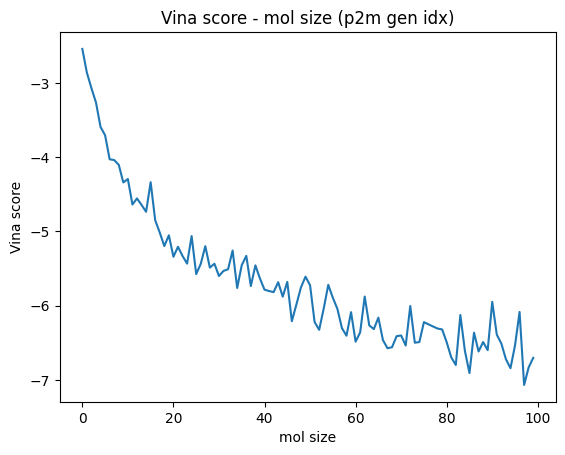

In [7]:
import torch
import glob
import os

case_list = glob.glob("/data/pocket2mol_data/DUD-E_sample_output/PDBBind-DUD_E_FLAPP_0.9_used_sample_all" + "/*")
case_list.sort()
case_list=[x for x in case_list if os.path.isdir(x)]
vina_score_list=[]
vina_min_list=[]
vina_score_case_list={}
idx_list={}
for case in case_list:
    try:
        result=torch.load(os.path.join(case, "results.pt"))
    except:
        print(f"Error: {case}")
        continue
    for idx, item in enumerate(result[:100]):
        vina_score_list.append(item['vina_score'][0]['affinity'])
        vina_min_list.append(item['vina_min'][0]['affinity'])

        case_name = os.path.basename(case)
        if case_name not in vina_score_case_list:
            vina_score_case_list[case_name] = []
        vina_score_case_list[case_name].append(item['vina_score'][0]['affinity'])

        if idx not in idx_list:
            idx_list[idx] = []
        idx_list[idx].append(item['vina_score'][0]['affinity'])  

print(f"Vina score mean: {sum(vina_score_list)/len(vina_score_list)}")
print(f"Vina score median: {sorted(vina_score_list)[len(vina_score_list)//2]}")
print(f"Vina min mean: {sum(vina_min_list)/len(vina_min_list)}")
print(f"Vina min median: {sorted(vina_min_list)[len(vina_min_list)//2]}")

# draw vina-idx plot
import matplotlib.pyplot as plt
x=list(range(100))
y=[0 for _ in  x]
for idx in idx_list:
    if idx in x:
        y[idx]=sum(idx_list[idx])/len(idx_list[idx])
print(idx_list)
print(y)
plt.plot(x, y)
plt.xlabel("mol size")
plt.ylabel("Vina score")
plt.title("Vina score - mol size (p2m gen idx)")
plt.show()

In [1]:
# calc gt vina

import os
import argparse
from copy import deepcopy
import torch
from tqdm.auto import tqdm
from rdkit.Chem.QED import qed
import sys
sys.path.append('.')
sys.path.append('.evaluation')
from utils.reconstruct import reconstruct_from_generated_with_edges
from evaluation.sascorer import compute_sa_score
from evaluation.docking import *
from utils.misc import *
from evaluation.scoring_func import *
from evaluation.docking_vina import VinaDockingTask
import rdkit 
from rdkit import Chem

sys.path.append("/project/ProFSA")
from scripts.benchmark.dataset import DUDEDataset

dataset=DUDEDataset()

vina_score_list=[]
for item in dataset:
    mol=Chem.MolFromMol2File(item['ligand_dir'])
    vina_task = VinaDockingTask.from_generated_mol(
            mol, protein_root=item['protein_dir'],
            tmp_dir="/data/vina_tmp"
            )
    try:
        score_only_results = vina_task.run(mode='score_only', exhaustiveness=8)
        # minimize_results = vina_task.run(mode='minimize', exhaustiveness=8)
        vina_score_list.append(score_only_results[0]['affinity'])
        print(score_only_results[0]['affinity'])
    except KeyboardInterrupt:
        raise KeyboardInterrupt
    except:
        print(f"Error: {item['name']}")

 

/home/tanhaichuan/.conda/envs/sbdd/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-6.661
-6.033
-12.415
-9.289
-8.931
-8.573
-5.03
-9.162
-10.667
-9.368
Error: dyr
-2.885
-7.656
-6.982
-8.04
-6.758
-7.796
-6.35
-6.992
-7.847
-9.002
-7.702
-8.397
-7.33
-6.087
Error: hivpr
-10.577
-9.595
-9.212
Error: thrb
-11.104
Error: cp2c9
-9.766
Error: ampc
-10.309
-5.828
-10.675
-9.093
-4.395
-7.813
-2.892
-8.449
-9.559
-7.167
-8.431
-7.309
-11.591
-10.84
-8.108
-7.487
-10.137
-10.963
Error: lkha4
Error: cdk2
-8.706
0.408
Error: mapk2
-7.39
-6.558
Error: akt1
Error: pparg
-6.954
-7.819
-8.001
-9.353
-10.055
-11.571
-3.199
-7.856
-9.499
Error: fabp4
-10.668
-7.042
Error: fpps
-10.865
-9.314
Error: cah2
-5.863
-5.798
-6.251
-7.962


[20:57:23] VIA: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


Error: pde5a
-11.997
-4.927
-9.167
-5.15
-8.752
-9.051
-11.51
-10.189
-10.361
-10.125
-7.753
-9.24
-9.315
-5.249
-7.166
-9.271
-3.663
-5.6
-7.503


In [2]:
print("mean", sum(vina_score_list)/len(vina_score_list))
print("number of valid", len(vina_score_list))

mean -8.086873563218392
number of valid 87


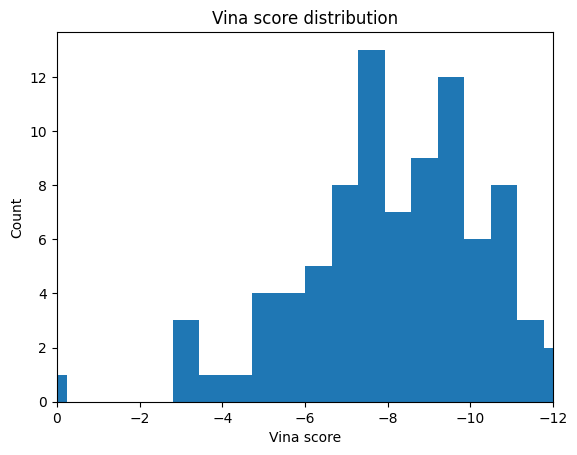

In [6]:
# dcd plot 
import matplotlib.pyplot as plt
plt.hist(vina_score_list, bins=20)
plt.xlabel("Vina score")
plt.ylabel("Count")
plt.xlim(0,-12)
plt.title("Vina score distribution")
plt.show()


In [1]:
# draw 4*4 =16 samples, draw there vina score with mol size chart

import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import sample 
import glob
#calc vina-atom_number per case

case_result={}
case_list = glob.glob("/data/pocket2mol_data/DUD-E_sample_output/PDBBind-DUD_E_FLAPP_0.9_used_sample_all/vina_dock_results" + "/*")
case_list.sort()

for case in case_list:
    try:
        result=torch.load(case)
    except:
        print(f"Error: {case}")
        continue
    for idx, item in enumerate(result[:100]):
        vina_score=item['vina_dock']
        mol=item['mol']
        atom_num=mol.GetNumAtoms()
        case_name= os.path.basename(case).split(".")[0]
        if case_name not in case_result:
            case_result[case_name]=[]
        case_result[case_name].append((vina_score, atom_num))

/home/tanhaichuan/.conda/envs/sbdd/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


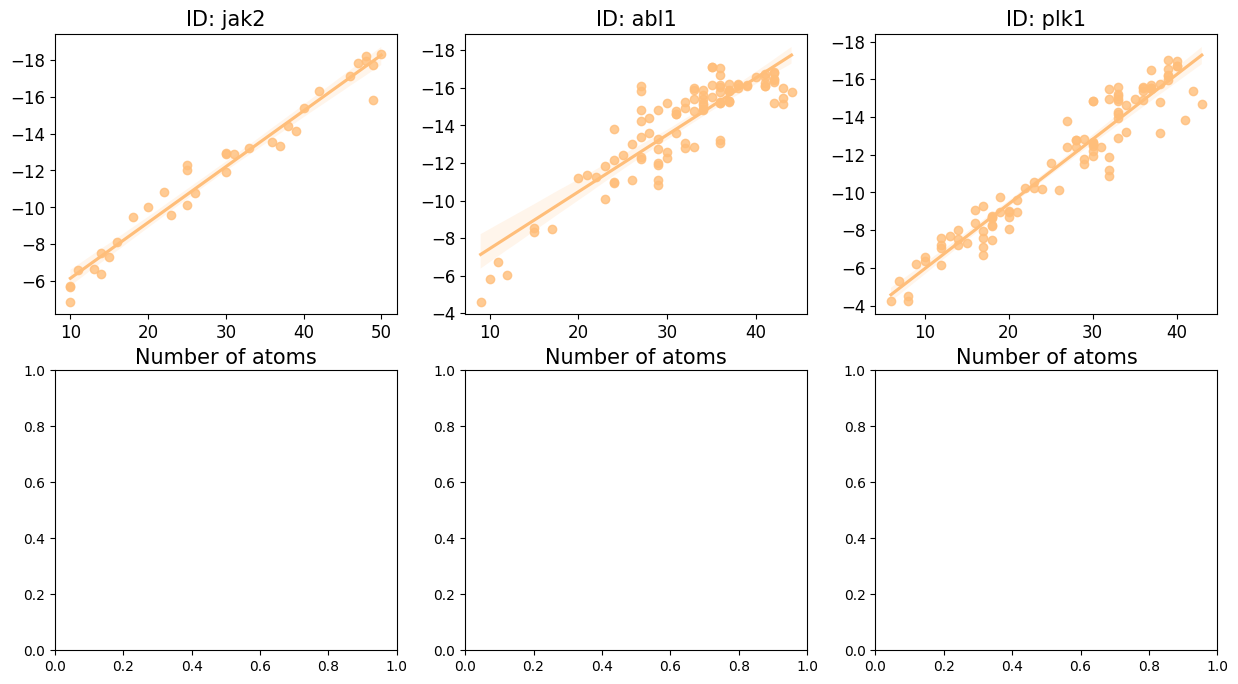

In [5]:
# draw n*m plot to show th viina score with atom number

import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd

case_list=["jak2", "abl1","plk1"]
# case_list= case_result.keys()

n = 2
m = 3
fig, axes = plt.subplots(n, m, figsize=(15, 8))

for idx, case in enumerate(case_list):
    x = []
    y = []
    for item in case_result[case]:
        x.append(item[1])
        y.append(item[0])
    ax = axes[idx // m, idx % m]

    data = pd.DataFrame({'Atom number': x, 'Vina score': y})

    sns.regplot(x='Atom number', y='Vina score', data=data, ax=ax, color='#FFBE7A')

    # fontsize
    ax.tick_params(axis='both', which='major', labelsize=12)

    # reverse y
    ax.invert_yaxis()
    ax.set_title("ID: "+case,fontsize=15)
    ax.set_xlabel("Number of atoms",fontsize=15)
    ax.set_ylabel("")

plt.savefig('./vina_atom_num.png',dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# draw 4*4 =16 samples, draw there qed score with mol size chart

import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import sample 
import glob
import rdkit
from rdkit.Chem import AllChem
from rdkit.Chem import QED

case_result={}
case_list = glob.glob("/data/pocket2mol_data/DUD-E_sample_output/PDBBind-DUD_E_FLAPP_0.9_used_sample_all/vina_dock_results" + "/*")
case_list.sort()

for case in case_list:
    try:
        result=torch.load(case)
    except:
        print(f"Error: {case}")
        continue
    for idx, item in enumerate(result[:100]):
        mol=item['mol']
        qed_score=QED.qed(mol)
        atom_num=mol.GetNumAtoms()
        case_name= os.path.basename(case).split(".")[0]
        if case_name not in case_result:
            case_result[case_name]=[]
        case_result[case_name].append((qed_score, atom_num))

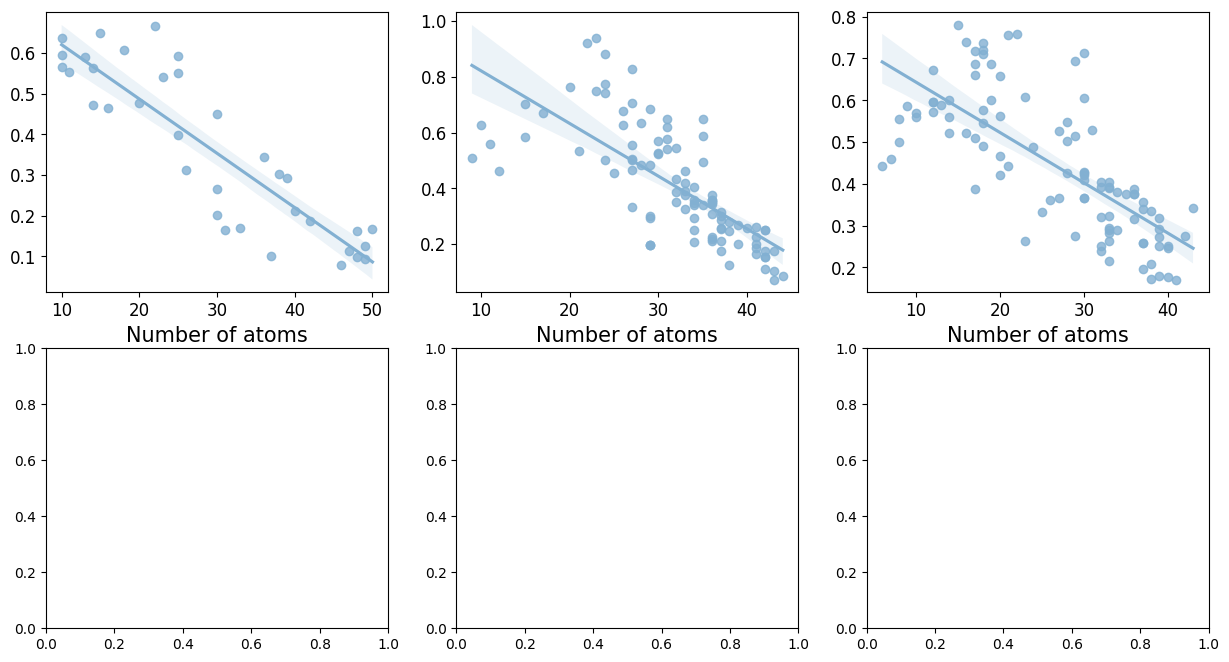

In [9]:
# draw n*m plot to show th viina score with atom number

import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd
case_list=["jak2", "abl1","plk1"]
n = 2
m = 3
fig, axes = plt.subplots(n, m, figsize=(15, 8))

for idx, case in enumerate(case_list):
    x = []
    y = []
    for item in case_result[case]:
        x.append(item[1])
        y.append(item[0])
    ax = axes[idx // m, idx % m]

    data = pd.DataFrame({'Atom number': x, 'Vina score': y})

    sns.regplot(x='Atom number', y='Vina score', data=data, ax=ax, color='#82B0D2')
    ax.tick_params(axis='both', which='major', labelsize=12)

    # ax.set_title("Case: "+case.split("_")[1])
    ax.set_xlabel("Number of atoms",fontsize=15)
    ax.set_ylabel("")

plt.savefig('./qed_atom_num.png',dpi=300, bbox_inches='tight')
plt.show()
# save fig